# Financial News Data Analysis

## Introduction
This notebook performs an Exploratory Data Analysis (EDA) on a financial news dataset to uncover patterns, trends, and insights. The main focus is on analyzing the relationship between news sentiment and stock price movements.

## Objective
- Compute basic statistics for textual lengths (headline length).
- Analyze the publication dates to identify trends.
- Perform sentiment analysis on news headlines.
- Extract common keywords or topics from the headlines.
- Analyze the time series data to understand publication frequency trends.
- Study the contribution of different publishers to the dataset.

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Get the absolute path of the scripts directory
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '../scripts'))

# Add the scripts directory to sys.path
sys.path.append(scripts_path)

# Custom Class
from financial_news_eda import FinancialNewsEDA

# Set plotting aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

[nltk_data] Downloading package punkt to /Users/judy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Data Loading and Initial Inspection

We start by loading the dataset and performing an initial inspection to understand the structure and contents of the data. This includes checking for missing values, data types, and a preview of the first few rows.


In [2]:
# Initialize the EDA class with the dataset path
eda = FinancialNewsEDA('/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/data/raw_analyst_ratings.csv')

# Load and inspect the data
eda.data.head()



/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/scripts/financial_news_eda.py:21: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(date_series, errors='coerce', infer_datetime_format=True)


,Unnamed: 0,headline,url,publisher,date,stock,year,month,day,weekday,hour
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020.0,6.0,5.0,4.0,10.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020.0,6.0,3.0,2.0,10.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020.0,5.0,26.0,1.0,4.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020.0,5.0,22.0,4.0,12.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020.0,5.0,22.0,4.0,11.0


### Descriptive Statistics
We calculate basic statistics related to the length of news headlines to understand the distribution of text lengths in the dataset.

In [3]:
# Compute basic statistics for headline lengths
eda.compute_headline_length()

Headline Length Statistics:
 count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [4]:
# Calculate the length of each headline
eda.data['headline_length'] = eda.data['headline'].apply(len)


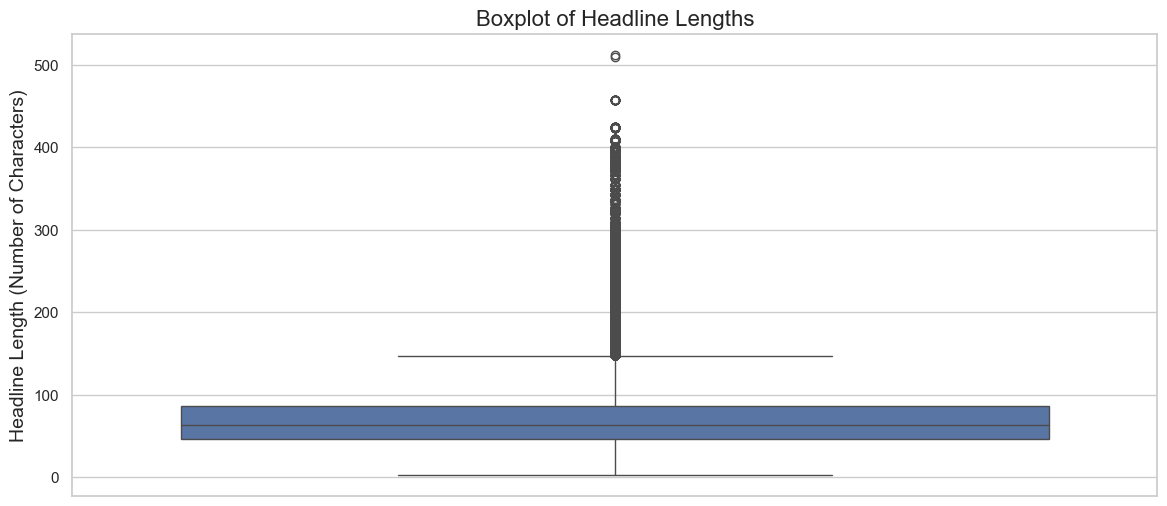

In [5]:
# Create a boxplot for headline lengths
plt.figure(figsize=(14, 6))
sns.boxplot(y=eda.data['headline_length'])


# Add labels and title
plt.ylabel('Headline Length (Number of Characters)', fontsize=14)
plt.title('Boxplot of Headline Lengths', fontsize=16)

# Show the plot
plt.show()


### Text Analysis
This section includes sentiment analysis to gauge the overall tone of the headlines and keyword extraction to identify common topics or significant events mentioned in the news.


### Time Series Analysis
We analyze the publication frequency over time to identify trends, spikes, or patterns that correlate with specific market events or periods of high activity.


In [6]:
df = pd.read_csv("/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/data/raw_analyst_ratings.csv")
print(df.isna().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [7]:
# Check for missing values in your dataframe
print(eda.data.isna().sum())

Unnamed: 0               0
headline                 0
url                      0
publisher                0
date               1351341
stock                    0
year               1351341
month              1351341
day                1351341
weekday            1351341
hour               1351341
headline_length          0
dtype: int64


/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/scripts/financial_news_eda.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='year', palette='viridis')


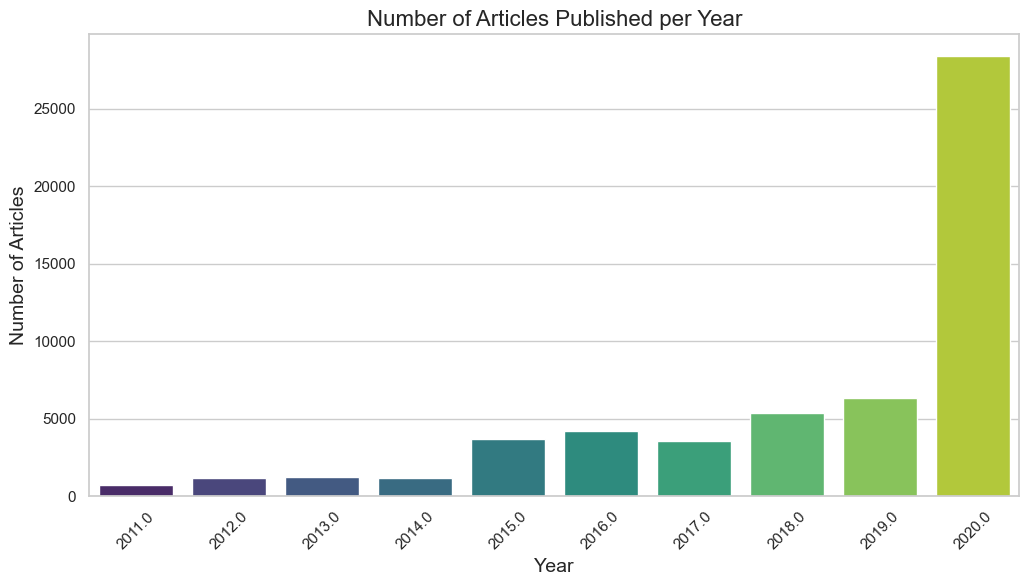

/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/scripts/financial_news_eda.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='month', palette='viridis')


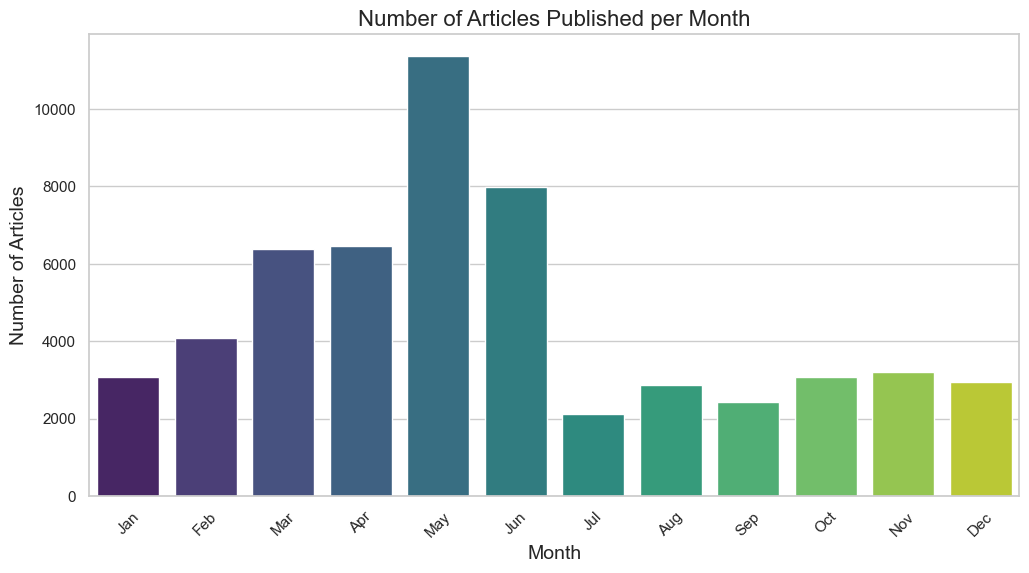

/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/scripts/financial_news_eda.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='day', palette='viridis')


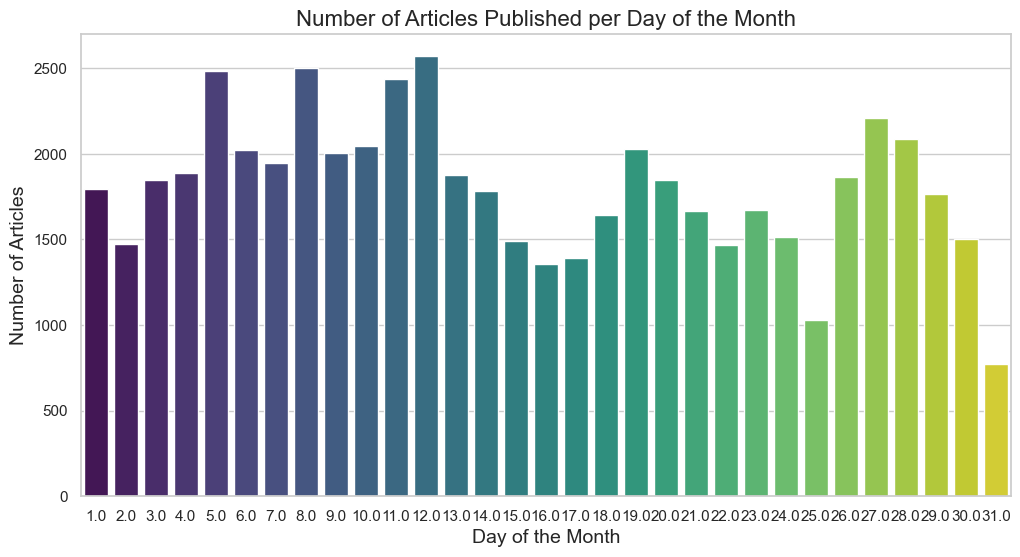

/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/scripts/financial_news_eda.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='weekday', palette='viridis')


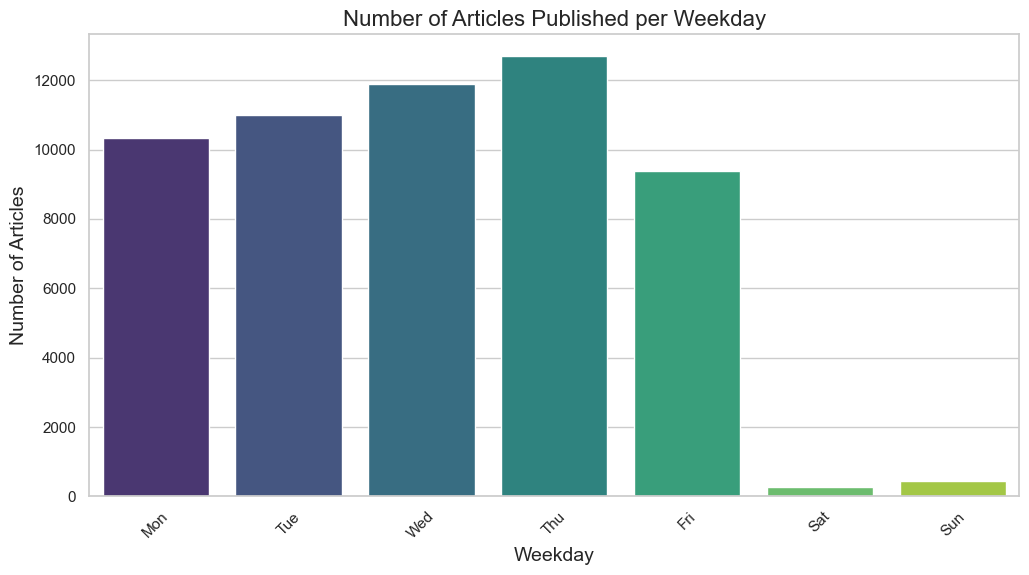

/Users/judy/Downloads/KAIM_Week_1_Challenge/financial-news-sentiment-analysis/scripts/financial_news_eda.py:139: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=self.data, x='hour', palette='viridis')


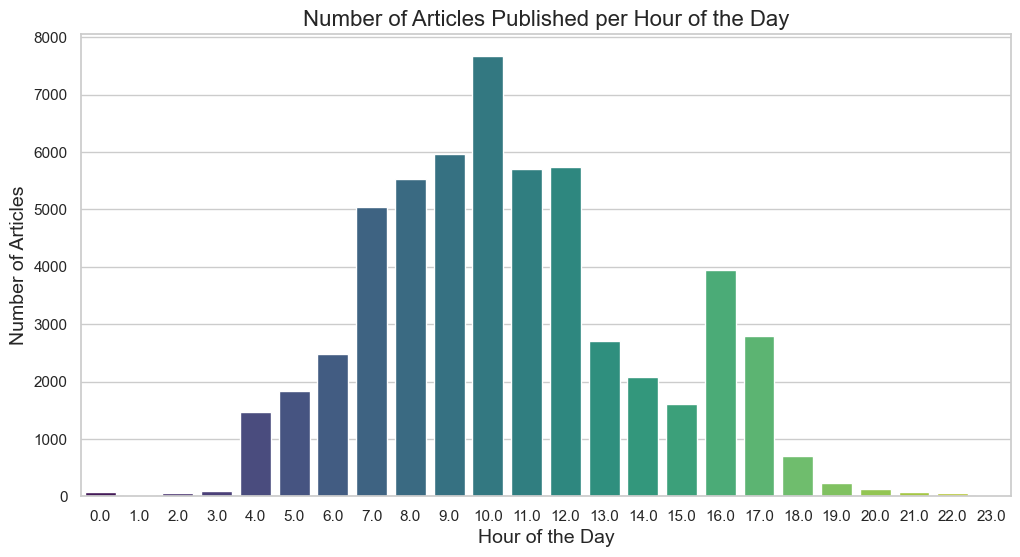

In [8]:
# Analyze the publication frequency over time
eda.analyze_publication_frequency()


In [9]:

eda.count_articles_per_publisher()


Top 10 Publishers by Article Count:
 publisher
Benzinga Newsdesk    14750
Lisa Levin           12408
ETF Professor         4362
Paul Quintaro         4212
Benzinga Newsdesk     3177
Benzinga Insights     2332
Vick Meyer            2128
Charles Gross         1790
Hal Lindon            1470
Benzinga_Newsdesk     1239
Name: count, dtype: int64


In [10]:
eda.analyze_publication_dates()


Yearly Trends:
 year
2011      760
2012     1187
2013     1240
2014     1189
2015     3695
2016     4223
2017     3581
2018     5395
2019     6325
2020    28392
Name: count, dtype: int64
Monthly Trends:
 month
1      3068
2      4091
3      6391
4      6468
5     11363
6      7968
7      2131
8      2858
9      2417
10     3079
11     3210
12     2943
Name: count, dtype: int64
Weekday Trends:
 day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64
